In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy.special
import seaborn as sns
from scipy.integrate import cumtrapz

dpi = 300
transparent = True
PI = np.pi
TWO_PI = 2*PI
NUM = 44000
show = False

sns.set_theme('paper')
sns.set_style("whitegrid")

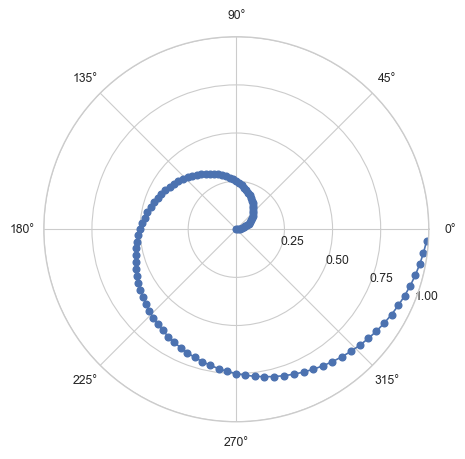

In [2]:
r = np.arange(0, 1, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(figsize=(10,5), subplot_kw={'projection': 'polar'})
ax.plot(theta, r, marker='o')

ax.set_rmax(1)
ax.set_rticks([0.25, 0.5, 0.75, 1])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

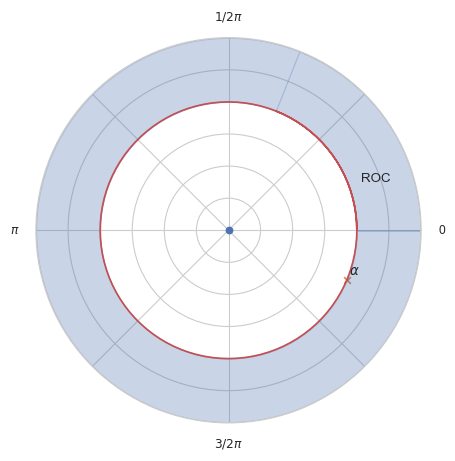

In [3]:
r = np.arange(0, 1.2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': 'polar'})
ax.scatter([0], [0], marker='o')
ax.scatter([2*np.pi-0.4], [1], marker='x')

ax.plot(2*np.pi*r, np.ones(len(r)), color='r')
ax.fill_between(2*np.pi*r, 1, np.ones(len(r))*1.5, color='b', alpha = 0.3)

ax.set_rmax(1.5)
ax.set_xticks([0, np.pi/4, 2*np.pi/4, 3*np.pi/4, 4*np.pi/4, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4 ])
ax.set_xticklabels([r'0', r'', r'$1/2\pi$', r'', r'$\pi$', r'', r'$3/2\pi$', ''])
ax.set_rticks([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5])  # Less radial ticks
ax.set_yticklabels([r'', '', '', '', r'', '', ''])  # Less radial ticks
ax.text(-0.35,1,r'$\alpha$')
ax.text(0.35,1.1,r'ROC')
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True);

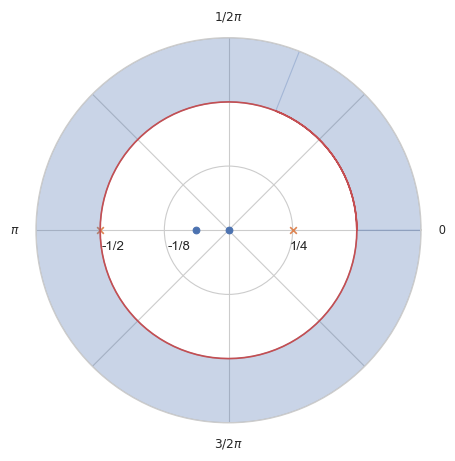

In [4]:
r = np.arange(0, 1.2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': 'polar'})
ax.scatter([0,np.pi], [0,1/8], marker='o')
ax.scatter([0,np.pi], [1/4,1/2], marker='x')

ax.plot(2*np.pi*r, np.ones(len(r))*0.5, color='r')
ax.fill_between(2*np.pi*r, 1/2, np.ones(len(r)), color='b', alpha = 0.3)

ax.set_rmax(0.75)
ax.set_xticks([0, np.pi/4, 2*np.pi/4, 3*np.pi/4, 4*np.pi/4, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4 ])
ax.set_xticklabels([r'0', r'', r'$1/2\pi$', r'', r'$\pi$', r'', r'$3/2\pi$', ''])
ax.set_rticks(np.array([0, 0.25, 0.5, 0.75]))  # Less radial ticks
ax.set_yticklabels([r'', '', '', ''])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.text(np.pi+0.3,1/8*2,r'-1/8')
ax.text(np.pi+0.15,1/2,r'-1/2')
ax.text(-0.15*2,1/4,r'1/4')
ax.grid(True);

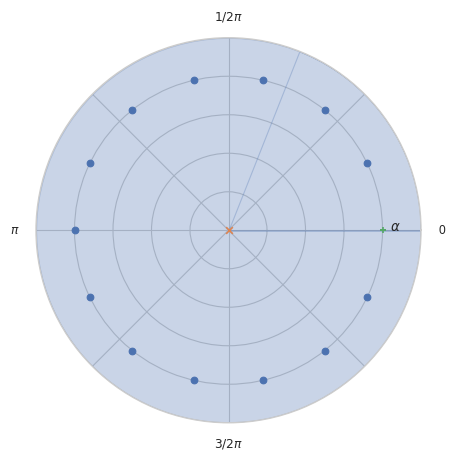

In [5]:
r = np.arange(0, 1.2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': 'polar'})
ax.fill_between(2*np.pi*r, 0, np.ones(len(r))*1.25, color='b', alpha = 0.3)

ax.scatter(np.linspace(0, 2*np.pi, 15)[1:-1:], np.ones(15)[1:-1:], marker='o')

ax.scatter([0], [0], marker='x')

ax.scatter([0], [1.0], marker='+')

ax.set_rmax(1.25)
ax.set_xticks([0, np.pi/4, 2*np.pi/4, 3*np.pi/4, 4*np.pi/4, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4 ])
ax.set_xticklabels([r'0', r'', r'$1/2\pi$', r'', r'$\pi$', r'', r'$3/2\pi$', ''])
ax.set_rticks(np.array([0, 0.25, 0.5, 0.75, 1.0, 1.25]))  # Less radial ticks
ax.set_yticklabels([r'', '', '', '', '', ''])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.text(0,1.05,r'$\alpha$')
ax.grid(True);

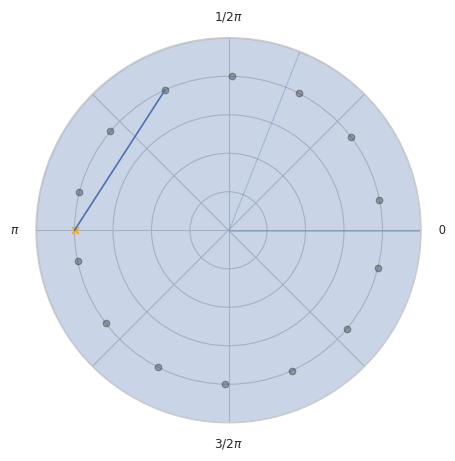

In [38]:
r = np.arange(0, 1.2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': 'polar'})
ax.fill_between(2*np.pi*r, 0, np.ones(len(r))*1.25, color='b', alpha = 0.3)

ax.scatter(np.linspace(0.2, 2*np.pi+0.2, 15)[:-1], np.ones(15)[:-1], marker='o', c='black', alpha=0.3)

ax.scatter([np.pi], [1], marker='x', c='orange')

x1, y1 = [np.pi, np.linspace(0.2, 2*np.pi+0.2, 15)[4]], [1, 1]
ax.plot(x1, y1)

ax.set_rmax(1.25)
ax.set_xticks([0, np.pi/4, 2*np.pi/4, 3*np.pi/4, 4*np.pi/4, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4 ])
ax.set_xticklabels([r'0', r'', r'$1/2\pi$', r'', r'$\pi$', r'', r'$3/2\pi$', ''])
ax.set_rticks(np.array([0, 0.25, 0.5, 0.75, 1.0, 1.25]))
ax.set_yticklabels([r'', '', '', '', '', ''])
ax.set_rlabel_position(-22.5)
ax.grid(True);

In [34]:
np.linspace(0.2, 2*np.pi, 20)

array([0.2       , 0.52016765, 0.8403353 , 1.16050294, 1.48067059,
       1.80083824, 2.12100589, 2.44117353, 2.76134118, 3.08150883,
       3.40167648, 3.72184413, 4.04201177, 4.36217942, 4.68234707,
       5.00251472, 5.32268236, 5.64285001, 5.96301766, 6.28318531])